### University of California, Berkeley
### Chem 274B: Software Engineering Fundamentals for Molecular Sciences 
### Final Project
### Creators:  Francine Bianca Oca, Kassady Marasigan and Korede Ogundele
### Date Created: December 5, 2023

This file contains functions and plots that pertain to our allele frequency model.

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## function to plot allele frequency of a current generation

In [44]:

def plot_generation_counts(generation_number):
    """
    This function plots the number of each individuals that have a certain genotype as a bar graph

    Parameters
    ----------
    generation_number : int
    The generation number whose allele frequencies we would like to look at

    Returns
    -------
    A bar graph with ___

    """
    # open text file containing generation counts
    with open('Data/generation_counts.txt', 'r') as file:
        lines = file.readlines()

    # extract counts for the specified generation
    for line in lines:
        if line.startswith(f'Generation {generation_number}:'):
            counts_line = line.strip().split(', ')
            print(f"counts_line: {counts_line}") # just to see
            recessive_count = int(counts_line[0].split('=')[-1])
            dominant_count = int(counts_line[1].split('=')[-1])

            # get counts as a percentage of total population
            total_population = recessive_count + dominant_count
            recessive_percentage = recessive_count / total_population
            dominant_percentage = dominant_count / total_population
            break
    else:
        # return an error if generation number is not found
        print(f"ERROR: Generation {generation_number} not found.")
        return

    # Plot
    labels = ['Recessive', 'Dominant']
    counts = [recessive_percentage, dominant_percentage]

    plt.bar(labels, counts, color=['lightblue', 'lightcoral'])
    plt.title(f'Allele Percentage for Generation {generation_number}')
    plt.xlabel('Genotype')
    plt.ylabel('Proportion of Population')
    plt.show()

counts_line: ['Generation 10: Recessive count = 82', 'Dominant count = 418']


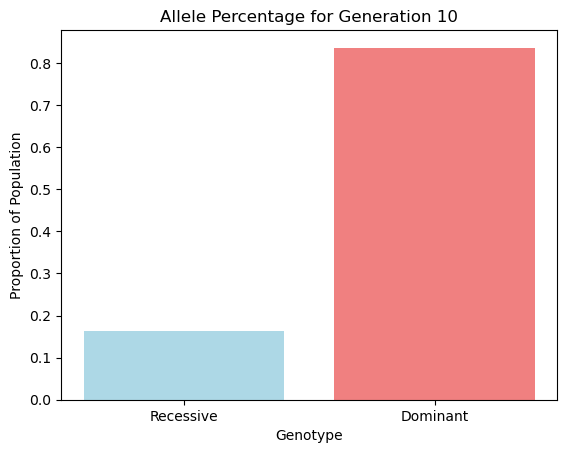

In [45]:
# Example usage: Plot counts for Generation 10
plot_generation_counts(10)

In [25]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [26]:
sns.color_palette("pastel")

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

## function to simulate generations

In [47]:
num_generations = 100
population_size = 500
initial_recessive_frequency = 0.2
reproduction_rate = 1

def simulate_generations(num_generations, population_size, initial_recessive_frequency, reproduction_rate):
    """
    Simulate changes in allele frequency through multiple generations.
    """
    allele_frequencies = []
    population = initialize_population(population_size, initial_recessive_frequency)

    for generation in range(num_generations):
        # Reproduction
        new_population = reproduce(population, reproduction_rate)

        # Calculate allele frequencies
        recessive_count = np.count_nonzero(new_population == 0)
        dominant_count = np.count_nonzero(new_population == 1)
        recessive_frequency = recessive_count / population_size

        # Record allele frequencies for the current generation
        allele_frequencies.append(recessive_frequency)

        # Update the population for the next generation
        population = new_population

    return allele_frequencies

def plot_simulation(allele_frequencies):
    """
    Plot the allele frequency changes over generations.
    """
    generations = range(len(allele_frequencies))
    plt.plot(generations, allele_frequencies, marker='o')
    plt.xlabel('Generation')
    plt.ylabel('Recessive Allele Frequency')
    plt.title('Simulation of Allele Frequency Changes')
    plt.show()

In [56]:
# open text file containing generation counts
with open('Data/generation_counts.txt', 'r') as file:
    generation_info = file.readlines()

# get all dominant and recessive counts
def extract_counts_for_all_generations(lines):
    recessive_counts = []
    dominant_counts = []

    for line in lines:
        if line.startswith('Generation'):
            counts_line = line.strip().split(', ')
            recessive_count = int(counts_line[0].split('=')[-1])
            dominant_count = int(counts_line[1].split('=')[-1])

            recessive_counts.append(recessive_count)
            dominant_counts.append(dominant_count)

    return recessive_counts, dominant_counts

In [58]:
# Example usage:

lines = generation_info.split('\n')
recessive_counts, dominant_counts = extract_counts_for_all_generations(generation_info)

# Now, recessive_counts and dominant_counts contain counts for all generations
print(f"Recessive counts for all generations: {recessive_counts}")
print(f"Dominant counts for all generations: {dominant_counts}")

AttributeError: 'list' object has no attribute 'split'

In [54]:
contents

'Generation 0: Recessive count = 320, Dominant count = 180\nGeneration 1: Recessive count = 281, Dominant count = 219\nGeneration 2: Recessive count = 261, Dominant count = 239\nGeneration 3: Recessive count = 204, Dominant count = 296\nGeneration 4: Recessive count = 167, Dominant count = 333\nGeneration 5: Recessive count = 136, Dominant count = 364\nGeneration 6: Recessive count = 112, Dominant count = 388\nGeneration 7: Recessive count = 99, Dominant count = 401\nGeneration 8: Recessive count = 101, Dominant count = 399\nGeneration 9: Recessive count = 88, Dominant count = 412\nGeneration 10: Recessive count = 82, Dominant count = 418\nGeneration 11: Recessive count = 74, Dominant count = 426\nGeneration 12: Recessive count = 58, Dominant count = 442\nGeneration 13: Recessive count = 54, Dominant count = 446\nGeneration 14: Recessive count = 49, Dominant count = 451\nGeneration 15: Recessive count = 44, Dominant count = 456\nGeneration 16: Recessive count = 37, Dominant count = 463